In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
conda activate tensorflow-gpu


Note: you may need to restart the kernel to use updated packages.


In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2164746731095378625
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6533124185
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10621456530835808376
physical_device_desc: "device: 0, name: GeForce RTX 2060 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [4]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
tf.test.is_built_with_cuda()

True

In [6]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [7]:
def plot_sample(index):
    plt.figure(figsize=(10,3))
    plt.imshow(X_train[index])

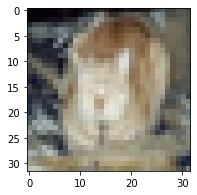

In [8]:
plot_sample(33)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [11]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [12]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [13]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [14]:
y_train_categorical.shape

(50000, 10)

In [15]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 5s 3ms/step - loss: 1.9344 - accuracy: 0.3034


In [17]:
np.argmax(model.predict(X_test_scaled)[0])

3

In [18]:
y_test[0]

array([3], dtype=uint8)

In [19]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

In [1]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

NameError: name 'tf' is not defined

In [22]:
conda activate tensorflow-gpu


Note: you may need to restart the kernel to use updated packages.


In [23]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9333 - accuracy: 0.3028
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6514 - accuracy: 0.4171
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5533 - accuracy: 0.4525
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4899 - accuracy: 0.4758
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4349 - accuracy: 0.4984
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4016 - accuracy: 0.5044
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3563 - accuracy: 0.5192
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3110 - accuracy: 0.5408
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2749 - accuracy: 0.5540
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.253

In [24]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.9289 - accuracy: 0.3024
Epoch 2/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.6472 - accuracy: 0.4206
Epoch 3/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.5491 - accuracy: 0.4537
Epoch 4/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.4904 - accuracy: 0.4758
Epoch 5/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.4479 - accuracy: 0.4915
Epoch 6/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.3909 - accuracy: 0.5102
Epoch 7/10
1563/1563 [==============================] - 41s 27ms/step - loss: 1.3539 - accuracy: 0.5237
Epoch 8/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.3244 - accuracy: 0.5324
Epoch 9/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.2772 - accuracy: 0.5522
Epoch 10/10
1563/1563 [==============================] - 42s 27m